# Rendimiento simple y logaritmico de acciones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime
import math

In [2]:
ticker='PG'
start = datetime.datetime(1995,1,1)
end = datetime.datetime(2017,3,23)

try:
    data = yf.download(ticker, start=start, end=end)['Adj Close']
    PG = pd.DataFrame(data)
    #data.columns = [ticker]
    #print(data.head())
except Exception as e:
    print(f"Ocurrio un error al intentar descargar los datos:{e}")

[*********************100%%**********************]  1 of 1 completed


In [3]:
PG.head()

,Adj Close
Date,
1995-01-03,7.529931
1995-01-04,7.469573
1995-01-05,7.363942
1995-01-06,7.379032
1995-01-09,7.348850


In [4]:
PG.tail()

,Adj Close
Date,
2017-03-16,75.101349
2017-03-17,74.739967
2017-03-20,74.920639
2017-03-21,74.896011
2017-03-22,74.731743


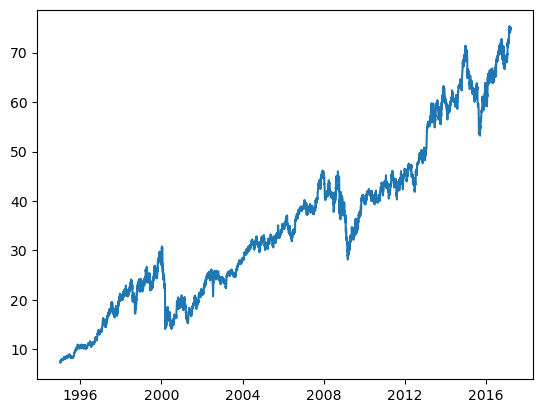

In [5]:
plt.plot(PG)

Simple rate of return

$$\frac{P_1-P_0}{P_0}=\frac{P_1}{P_0}-1$$

In [6]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1) - 1)

### Simulación del precio de una acción

Es posible simular el precio de una accion $P_t$ utilizando la siguiente expresión
\begin{align*}
    P_t=P_o\ e^{\ (\mu-\frac{\sigma^2}{2})\ t\ +\ \sigma W_t}
\end{align*}

Esta expresión supone que los los precios de la acción se compartan como un *Movimiento Browniano* $W_t$ y que la volatilidad de los precios es constante.  

In [89]:
#funcion que simula los precios de una accion para los proximos 30 dias
def exp_precios():
    #Datos necesarios
    media = np.mean(PG['simple_return'])
    var = np.var(PG['simple_return'])
    p0=PG['Adj Close'].iloc[-1]

    #Variables necesarias para el programa
    ultimo_indice = PG['Adj Close'].index[-1]
    PT = pd.Series([],dtype=float)

    #Ciclo que estima el precio de la accion los prox 30 dias
    for i in range(1,30+1):
        w_t=np.random.normal(0,1)
        p_t=p0*np.exp((media-(var/2)*i)+np.sqrt(var)*w_t)
        p0=p_t

        nuevo_indice = ultimo_indice + pd.Timedelta(days=i)
        PT[nuevo_indice]=p0
    
    return PT #PT es una serie de tamaño 30 que contiene el precio simulado de cada uno de los 30 días
    

In [90]:
#Realizamos N veces el experimento anterios
def simu_precios(N):
    l_sim=[]
    
    for i in range(N):
        PT=exp_precios()
        l_sim.append(PT)
        
    return l_sim    

In [119]:
N=100
l_sim = simu_precios(N)

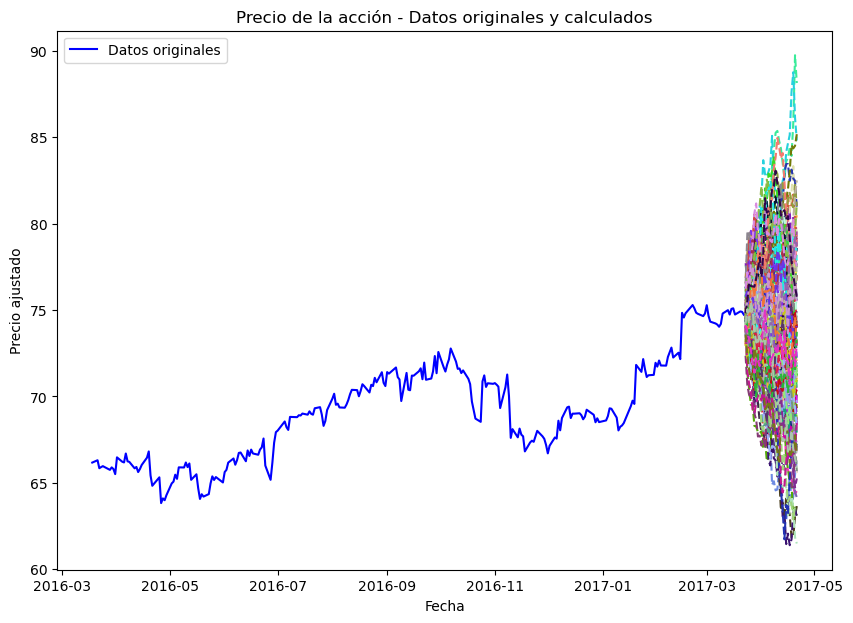

In [120]:
# Ploteo de los datos originales y calculados
plt.figure(figsize=(10, 7))

# Plotear los datos originales
plt.plot(PG['Adj Close'][-255:], label='Datos originales', color='blue')

# Plotear los datos calculados
for PT in l_sim:
    color_bgr = tuple(np.random.rand(3))
    plt.plot(PT, color=color_bgr, linestyle='--')

# Añadir título y etiquetas
plt.title('Precio de la acción - Datos originales y calculados')
plt.xlabel('Fecha')
plt.ylabel('Precio ajustado')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [54]:
print(PG['simple_return'])

Date
1995-01-03    0.000000
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2017-03-16    0.000438
2017-03-17   -0.004812
2017-03-20    0.002417
2017-03-21   -0.000329
2017-03-22   -0.002193
Name: simple_return, Length: 5595, dtype: float64


In [ ]:
PG['simple_return'].plot(figsize=(8,5))

In [ ]:
media = np.mean(PG['simple_return'])
desviacion = np.std(PG['simple_return'])
limite_inferior = media - 1.96 * desviacion / np.sqrt(len(PG['simple_return']))
limite_superior = media + 1.96 * desviacion / np.sqrt(len(PG['simple_return']))

PG['simple_return'].plot(figsize=(8,5))
plt.axhline(y=limite_inferior, color='black', linestyle='--', label=f'Límite Inferior ({limite_inferior:.2f})')
plt.axhline(y=limite_superior, color='black', linestyle='--', label=f'Límite Superior ({limite_superior:.2f})')
plt.axhline(y=media, color='red', linestyle='-', label=f'Media ({media:.2f})')

In [ ]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

# Este es el retorno diario

In [ ]:
# El retorno anual, se calcula no multiplicando por 365, pues no hay actividad diaria realmente.
# Por quitar días sabado, domingo y feriados.
# Lo correcto es 250, a veces 251 o 252 
# Así, el retorno anual es

In [ ]:
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a

In [ ]:
print(str(round(avg_returns_a, 5) * 100) + '%') 

Retorno logaritmo
\begin{equation*}
r_{log} = log \left( \frac{p_1}{p_0} \right)
\end{equation*}

\begin{equation*}
x \approx ln(x + 1) \ x \rightarrow 0 
\end{equation*}

In [ ]:
PG['simple_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))

In [ ]:
print(PG['simple_return'])

<Axes: xlabel='Date'>

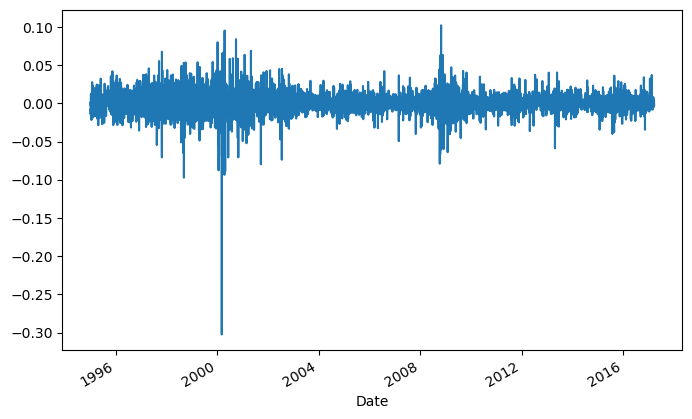

In [8]:
PG['simple_return'].plot(figsize=(8,5))

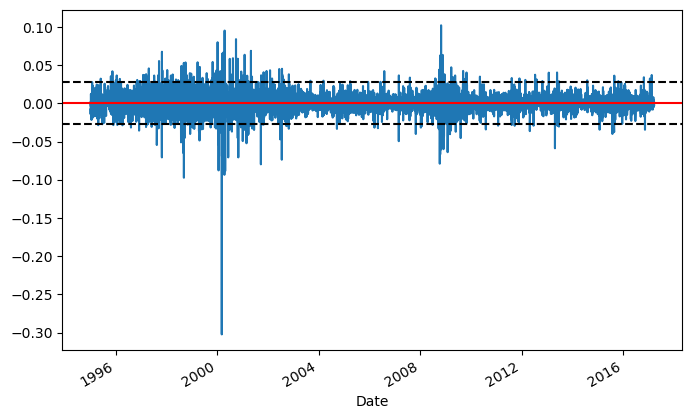

In [9]:
media = np.mean(PG['simple_return'])
desviacion = np.std(PG['simple_return'])
limite_inferior = media - 1.96*desviacion
limite_superior = media + 1.96*desviacion

PG['simple_return'].plot(figsize=(8,5))
plt.axhline(y=limite_inferior, color='black', linestyle='--', label=f'Límite Inferior ({limite_inferior:.2f})')
plt.axhline(y=limite_superior, color='black', linestyle='--', label=f'Límite Superior ({limite_superior:.2f})')
plt.axhline(y=media, color='red', linestyle='-', label=f'Media ({media:.2f})')

In [10]:
PG['simple_return'] = PG['simple_return'].fillna(0)  # O algún otro método de manejo de NaN
x = min(PG['simple_return'])
print(x)

-0.3023584820236628


array([234,  57, 174])